In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

df=pd.read_csv('/content/drive/MyDrive/dataset/corpusfinal.csv') 
print("Shape of data=>",df.shape)

Shape of data=> (1977, 5)


In [11]:
df.isnull().sum()

Unnamed: 0     0
document       0
paper          0
abs_summary    1
ext_summary    1
dtype: int64

In [16]:
df["document"].head(5)

0    The ninth International Conference on Forest F...
1    Swedish wildfires are handled by multipurpose ...
2    In Pedrógão Grande on 17 June 2017, two fire f...
3    Junction fires occur when two fire fronts merg...
4    Lightning is the most common origin of natural...
Name: document, dtype: object

In [50]:
import string
punc = string.punctuation

df['sum_sent_count'] = df['document'].apply(lambda x : len(x.split(".")))
df['sum_word_count'] = df['document'].apply(lambda x : len(x.split()))
df['sum_char_count'] = df['document'].apply(lambda x : len(x.replace(" ","")))
df['sum_word_density'] = df['sum_word_count'] / (df['sum_char_count'] + 1)
df['sum_sent_density'] = df['sum_sent_count'] / (df['sum_word_count'] + 1)
df['sum_punc_count'] = df['document'].apply(lambda x : len([a for a in x if a in punc]))

In [30]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

def count_stopwords(text, stopwords):
    word_tokens = text.split()
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

df['sum_stopw_count'] =  df['document'].apply(lambda x : count_stopwords(x, stopwords))
df['sum_stopw_density'] = df['sum_stopw_count'] / (df['sum_word_count'] + 1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df["sum_stopw_density"].head(10)

0    0.280576
1    0.275000
2    0.361257
3    0.291457
4    0.292135
5    0.286486
6    0.324873
7    0.335294
8    0.378698
9    0.359116
Name: sum_stopw_density, dtype: float64

In [34]:
nltk.download("wordnet")
nltk.download("words")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
words = set(nltk.corpus.words.words())
corpus=[]
def pre_process(text):
    text = re.sub("(\\d|\\W)+"," ",str(text)) 
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words and word in words and len(word)>2]
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    text = " ".join(text)
    corpus.append(text)
    return text
df['cleaned'] = df['document'].apply(lambda x:pre_process(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


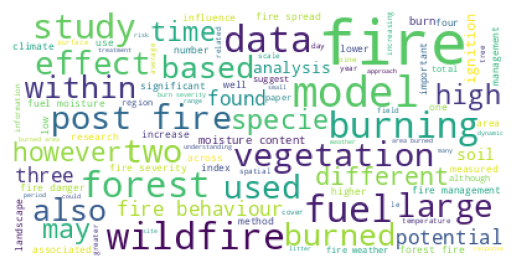

In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

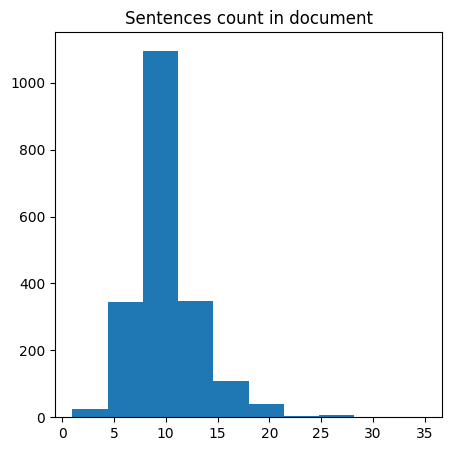

In [44]:
fig = plt.figure(figsize =(5, 5))
plt.hist(df["sum_sent_count"])
plt.title("Sentences count in document")
plt.show()

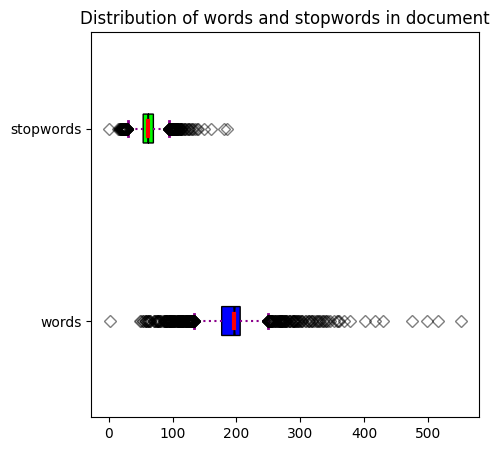

In [48]:
fig = plt.figure(figsize =(5, 5))
data = [df["sum_word_count"], df["sum_stopw_count"]]
ax = fig.add_subplot(111)
 
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['words', 'stopwords'])
 
# Adding title
plt.title("Distribution of words and stopwords in document")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

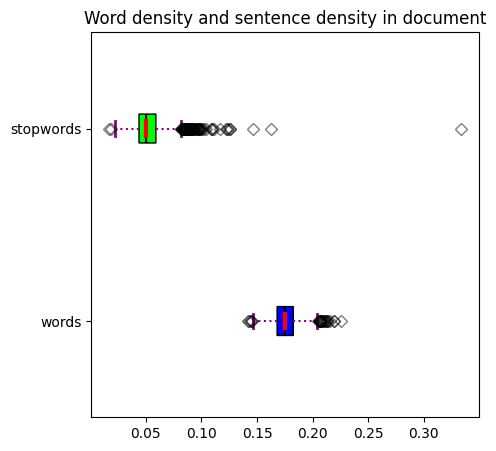

In [52]:
fig = plt.figure(figsize =(5, 5))
data = [df["sum_word_density"], df["sum_sent_density"]]
ax = fig.add_subplot(111)
 
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['words', 'stopwords'])
 
# Adding title
plt.title("Word density and sentence density in document")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

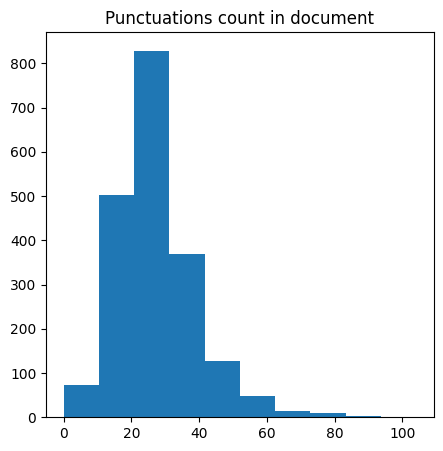

In [53]:
fig = plt.figure(figsize =(5, 5))
plt.hist(df["sum_punc_count"])
plt.title("Punctuations count in document")
plt.show()